In [2]:
import os
import pandas as pd
from tqdm import tqdm

# Diretório base de busca
base_dir = r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL\data\curated"

# Diretório e arquivo de saída (mesmo nome de saída solicitado)
saida_dir = r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\analises_preliminares"
os.makedirs(saida_dir, exist_ok=True)
saida = os.path.join(saida_dir, "auditoria_cabecalhos.csv")

# 1) Coleta de arquivos .csv
csv_paths = []
for root, _, files in os.walk(base_dir):
    for f in files:
        if f.lower().endswith(".csv"):
            csv_paths.append(os.path.join(root, f))

# 2) Mapeia "nome do arquivo" -> conjunto de variáveis (cabeçalhos)
arquivos_colunas = {}
for caminho in tqdm(csv_paths, desc="Lendo cabeçalhos"):
    nome_arquivo = os.path.basename(caminho)
    try:
        cols = pd.read_csv(caminho, nrows=0, sep=None, engine="python").columns.tolist()
        arquivos_colunas[nome_arquivo] = set(cols)
    except Exception as e:
        print(f"Erro ao ler cabeçalho de {caminho}: {e}")

# 3) Constrói a matriz: linhas = variáveis, colunas = arquivos, valores = 1 (presente) / 0 (ausente)
todas_variaveis = sorted(set().union(*arquivos_colunas.values())) if arquivos_colunas else []
todos_arquivos = sorted(list(arquivos_colunas.keys()))

df_matriz = pd.DataFrame(0, index=todas_variaveis, columns=todos_arquivos, dtype="int64")

for arquivo, cols in arquivos_colunas.items():
    if cols:
        df_matriz.loc[list(cols), arquivo] = 1

# 4) Salva a matriz em CSV
df_matriz.to_csv(saida, encoding="utf-8-sig")

print(f"Concluído. Variáveis: {df_matriz.shape[0]} | Arquivos: {df_matriz.shape[1]}")
print(f"Arquivo salvo em: {saida}")

# Exibe prévia
df_matriz.head(20)


Lendo cabeçalhos: 100%|██████████| 6/6 [00:00<00:00, 223.55it/s]

Concluído. Variáveis: 309 | Arquivos: 6
Arquivo salvo em: C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\analises_preliminares\auditoria_cabecalhos.csv


,a1_physics_informed.csv,a1_physics_informed_enriched.csv,a1_physics_informed_enriched_old.csv,a1_physics_informed_old.csv,a1_physics_informed_proxies.csv,a1_physics_informed_proxies_old.csv
1_lms_pdr_bin_continous_lvl_m,1,1,1,1,1,1
2_lms_pdr_bin_continous_lvl_m,1,1,1,1,1,1
air_primary_knm3_h,0,0,0,0,1,1
air_primary_nm3_h,0,0,0,0,1,1
air_primary_press_z,0,0,0,0,1,1
air_primary_share_pct,0,0,0,0,1,1
air_secondary_knm3_h,0,0,0,0,1,1
air_secondary_nm3_h,0,0,0,0,1,1
air_secondary_press_z,0,0,0,0,1,1
air_total_knm3_h,0,0,0,0,1,1


In [3]:
import os
import shutil

# Caminho de origem (onde o arquivo foi encontrado antes)
origem = r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL\data\curated\a1_physics_informed_proxies.csv"

# Caminho de destino
destino_dir = r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated"
os.makedirs(destino_dir, exist_ok=True)  # cria diretório se não existir

destino = os.path.join(destino_dir, "a1_physics_informed_proxies.csv")

# Copiar arquivo
shutil.copy2(origem, destino)

print(f"✅ Arquivo copiado com sucesso para: {destino}")


✅ Arquivo copiado com sucesso para: C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\a1_physics_informed_proxies.csv


In [3]:
# ==============================================================
# REFAZER SIGNIFICADOS USANDO 'nome_pt_curto' COMO CHAVE
# ==============================================================

import os, re, csv, unicodedata
from difflib import SequenceMatcher
import pandas as pd

# Caminhos
base_csv_candidates = [
    r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\a1_physics_informed_proxies.csv",
    r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL\data\curated\a1_physics_informed_proxies.csv",
]
saida_dir = r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated"
md_dict_path = r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\documentos\informacoes\NOME DAS VARIAVEIS E SEUS SIGNIFICADOS_COM_NOME_PT.md"

map_csv = os.path.join(saida_dir, "auditoria_semantica_mapeamento.csv")
pend_csv = os.path.join(saida_dir, "auditoria_semantica_pendencias.csv")
saida_csv = os.path.join(saida_dir, "A1_ML_DL.csv")

# ---------------------------
# Utilidades
# ---------------------------
def strip_accents(s: str) -> str:
    if not isinstance(s, str): return ""
    import unicodedata
    return "".join(c for c in unicodedata.normalize("NFKD", s) if not unicodedata.combining(c))

def normalize_token(s: str) -> str:
    import re
    s = strip_accents(str(s).lower())
    s = re.sub(r"[^a-z0-9_]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def split_tokens(s: str):
    import re
    return set(t for t in re.split(r"[ _]+", normalize_token(s)) if t)

SUFIXOS_REMOVER = {"avg","mean","median","med","p05","p10","p25","p75","p90","p95","min","max","std","var",
                   "zscore","pct","perc","sum","diff","delta","rate","flag","bin","idx","index","norm"}

def remove_suffixes(name: str) -> str:
    import re
    toks = [t for t in re.split(r"[_\s]+", str(name)) if t and t not in SUFIXOS_REMOVER and not re.fullmatch(r"[lL]?\d+", t)]
    return "_".join(toks) if toks else str(name)

ALIASES = {
    "o2": ["oxigenio","excesso_oxigenio"],
    "oxygen": ["oxigenio"],
    "temp": ["temperatura","temp"],
    "temperature": ["temperatura"],
    "press": ["pressao","pressao_diferencial","diferencial","dp"],
    "flow": ["vazao","fluxo"],
    "vel": ["velocidade"],
    "ash": ["cinza","cinzas"],
    "coal": ["carvao"],
    "power": ["potencia","carga"],
    "load": ["carga"],
    "eff": ["eficiencia"],
}

def expand_with_aliases(tokens: set) -> set:
    out = set(tokens)
    for t in list(tokens):
        if t in ALIASES:
            out.update(ALIASES[t])
    return out

def jaccard(a: set, b: set) -> float:
    if not a or not b: return 0.0
    return len(a & b) / len(a | b)

def hybrid_similarity(a: str, b: str) -> float:
    from difflib import SequenceMatcher
    a0, b0 = remove_suffixes(a), remove_suffixes(b)
    ta, tb = expand_with_aliases(split_tokens(a0)), expand_with_aliases(split_tokens(b0))
    jac = jaccard(ta, tb)
    seq = SequenceMatcher(None, normalize_token(a0), normalize_token(b0)).ratio()
    return 0.6*jac + 0.4*seq

# ---------------------------
# Verbetes (após a tabela no .md)
# ---------------------------
def read_md(md_path: str) -> str:
    if not os.path.exists(md_path):
        raise FileNotFoundError(f"MD não encontrado: {md_path}")
    with open(md_path, "r", encoding="utf-8") as f:
        return f.read()

def find_table_end(text: str) -> int:
    # localiza o final do último bloco de tabela
    last_end = 0
    for m in re.finditer(r"(?:^|\n)\s*\|.*\|\s*(?:\n\|.*\|)+", text, flags=re.MULTILINE):
        last_end = max(last_end, m.end())
    return last_end

def parse_md_verbetes(txt: str, start_pos: int):
    sub = txt[start_pos:] if start_pos < len(txt) else txt
    lines = sub.splitlines()

    entries = {}
    current_key = None
    current_buf = []

    def flush():
        nonlocal current_key, current_buf
        if current_key:
            desc = " ".join(ln.strip() for ln in current_buf).strip()
            desc = re.sub(r"\s+", " ", desc)
            if desc:
                entries[current_key] = desc
        current_key, current_buf = None, []

    pat_bold = re.compile(r"^\s*\*\*(?P<name>[^*]+)\*\*\s*[—\-:]\s*(?P<desc>.*)\s*$")
    pat_dash = re.compile(r"^\s*(?P<name>[A-Za-z0-9_]+)\s*[—\-:]\s*(?P<desc>.*)\s*$")
    pat_head = re.compile(r"^\s*#{1,6}\s*(?P<name>[A-Za-z0-9_]+)\s*$")

    for ln in lines:
        if not ln.strip():
            if current_key:
                current_buf.append("")
            continue

        m = pat_bold.match(ln) or pat_dash.match(ln)
        if m:
            flush()
            current_key = m.group("name").strip()
            current_buf = [m.group("desc").strip()]
            continue

        h = pat_head.match(ln)
        if h:
            flush()
            current_key = h.group("name").strip()
            current_buf = []
            continue

        if current_key:
            current_buf.append(ln)

    flush()
    # índice normalizado
    norm_index = {normalize_token(k): v for k, v in entries.items()}
    return entries, norm_index

# ---------------------------
# Localiza CSV base
# ---------------------------
def localizar_csv_base(cands):
    for p in cands:
        if os.path.exists(p):
            return p
    raise FileNotFoundError("CSV base 'a1_physics_informed_proxies.csv' não encontrado.")

# === 1) Carrega artefatos existentes
csv_base_path = localizar_csv_base(base_csv_candidates)
df_base = pd.read_csv(csv_base_path, engine="python", sep=None)

df_map = pd.read_csv(map_csv)
if "nome_pt_curto" not in df_map.columns:
    raise RuntimeError("Relatório de mapeamento não possui a coluna 'nome_pt_curto'.")

# === 2) Extrai verbetes do MD e cria índice
md_text = read_md(md_dict_path)
end_table = find_table_end(md_text)
verbetes_raw, verbetes_norm = parse_md_verbetes(md_text, end_table)

# === 3) Recalcula SIGNIFICADO usando nome_pt_curto como chave (semântica)
LIMIAR = 0.62
novos_significados = []
scores = []

for nome_curto in df_map["nome_pt_curto"].fillna(""):
    nome_curto_str = str(nome_curto).strip()
    if not nome_curto_str:
        novos_significados.append("")
        scores.append(0.0)
        continue

    # busca exata normalizada primeiro
    s_key = normalize_token(nome_curto_str)
    sig = verbetes_norm.get(s_key, "")

    best_score = 1.0 if sig else -1.0
    if not sig:
        # busca semântica nos títulos dos verbetes
        best_t, best_sig = None, ""
        for t, desc in verbetes_raw.items():
            sc = hybrid_similarity(nome_curto_str, t)
            if sc > best_score:
                best_score, best_t, best_sig = sc, t, desc
        if best_score >= LIMIAR:
            sig = best_sig
        else:
            sig = ""

    novos_significados.append(sig)
    scores.append(best_score if best_score > 0 else 0.0)

# === 4) Atualiza relatório e regrava pendências
df_map["significado"] = novos_significados
df_map["score_significado_por_nome_curto"] = [round(s, 4) for s in scores]
df_map.to_csv(map_csv, index=False, encoding="utf-8-sig")

pend = df_map[(df_map["nome_pt_curto"].str.strip() == "") | (df_map["significado"].str.strip() == "")]
pend.to_csv(pend_csv, index=False, encoding="utf-8-sig")

# === 5) Regera A1_ML_DL.csv com a linha 3 (significado) corrigida
linha1 = df_map["nome_pt_curto"].tolist()
linha2 = df_map["dimensao"].fillna("").tolist()
linha3 = df_map["significado"].fillna("").tolist()
linha4 = df_map["coluna_original"].tolist()

with open(saida_csv, "w", encoding="utf-8-sig", newline="") as f:
    w = csv.writer(f)
    w.writerow(linha1)
    w.writerow(linha2)
    w.writerow(linha3)
    w.writerow(linha4)

df_base.to_csv(saida_csv, mode="a", index=False, encoding="utf-8-sig")

print("Concluído.")
print(f"- Base: {csv_base_path}")
print(f"- A1_ML_DL atualizado: {saida_csv}")
print(f"- Mapeamento atualizado: {map_csv}")
print(f"- Pendências atualizadas: {pend_csv}")

# Prévia
display(df_map.head(20)[["coluna_original","nome_pt_curto","dimensao","significado","score_significado_por_nome_curto"]])


Concluído.
- Base: C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\a1_physics_informed_proxies.csv
- A1_ML_DL atualizado: C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\A1_ML_DL.csv
- Mapeamento atualizado: C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\auditoria_semantica_mapeamento.csv
- Pendências atualizadas: C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\auditoria_semantica_pendencias.csv


,coluna_original,nome_pt_curto,dimensao,significado,score_significado_por_nome_curto
0,timestamp,timestamp,timestamp,,0.0
1,leito_temp_average,bed_temperature_average_adegc,°C,,0.0
2,esp_comb_ff_b_saida_temp,esp_comb_with_ff_b_outl_temp_adegc,°C,,0.0
3,fornalha_leito_temp_10_12,furnace_bed_temp_10_12_sel_adegc,°C,,0.0
4,fornalha_leito_temp_13_15,furnace_bed_temp_10_12_sel_adegc,°C,,0.0
5,fornalha_leito_temp_16_18,furnace_bed_temp_10_12_sel_adegc,°C,,0.0
6,fornalha_leito_temp_1_3,furnace_bed_temp_10_12_sel_adegc,°C,,0.0
7,fornalha_leito_temp_4_6,furnace_bed_temp_10_12_sel_adegc,°C,,0.0
8,fornalha_leito_temp_7_9,furnace_bed_temp_10_12_sel_adegc,°C,,0.0
9,temp_vapor_reaquec_1,hot_reheat_steam_temperature_1_adegc,°C,,0.0


Reconstruído com exatamente 2 cabeçalhos: C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\A1_ML_DL.csv

--- VISÃO GERAL ---
Shape (linhas, colunas): (11757, 166)

--- AMOSTRA (5 linhas) ---
             timestamp  leito_temp_average  esp_comb_ff_b_saida_temp  \
0  2023-03-01 07:00:00             761.795                   101.267   
1  2023-03-01 08:00:00             751.677                   101.428   
2  2023-03-01 09:00:00             787.284                   100.140   
3  2023-03-01 10:00:00             794.582                   122.359   
4  2023-03-01 11:00:00             811.806                   132.101   

   fornalha_leito_temp_10_12  fornalha_leito_temp_13_15  \
0                    760.133                    753.804   
1                    781.253                    786.094   
2                    813.530                    811.910   
3                    819.608                    812.810   
4                    832.704                    831.331

C:\Users\wilso\AppData\Local\Temp\ipykernel_34640\1226889752.py:87: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_num[c] = pd.to_numeric(df_num[c], errors="ignore")


                                       count        mean         std      min  \
leito_temp_average                    9034.0  136.274896  406.849579 -504.193   
esp_comb_ff_b_saida_temp             11756.0   48.553671   63.252458   -7.696   
fornalha_leito_temp_10_12            11757.0  826.437565   24.426112  630.121   
fornalha_leito_temp_13_15            11757.0  826.314260   27.557525  636.149   
fornalha_leito_temp_16_18            11757.0  844.107406   26.177526  694.448   
fornalha_leito_temp_1_3              11757.0  832.412528   44.368917  690.000   
fornalha_leito_temp_4_6              11757.0  834.723712   28.003813  513.208   
fornalha_leito_temp_7_9              11757.0  841.826198   31.547704  659.922   
temp_vapor_reaquec_1                 11756.0  227.616804  260.980293    1.155   
lms_pdr_bin_flud_air_htr_temp        11373.0   94.354059   27.533981    6.279   
miain_vapor_temp                     11757.0  235.686243  256.441923    6.506   
t_bfbp_b_entrada_temp       

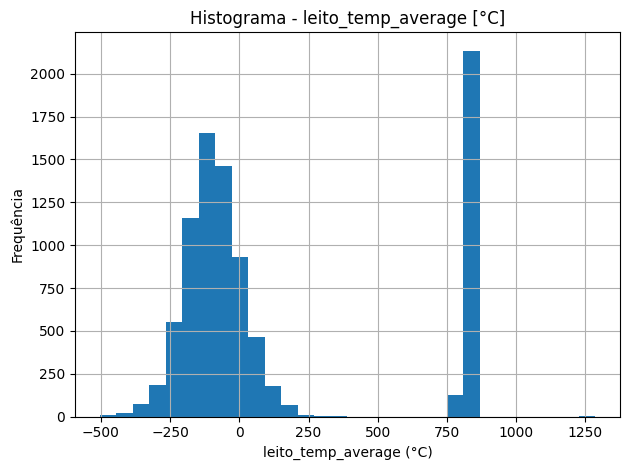

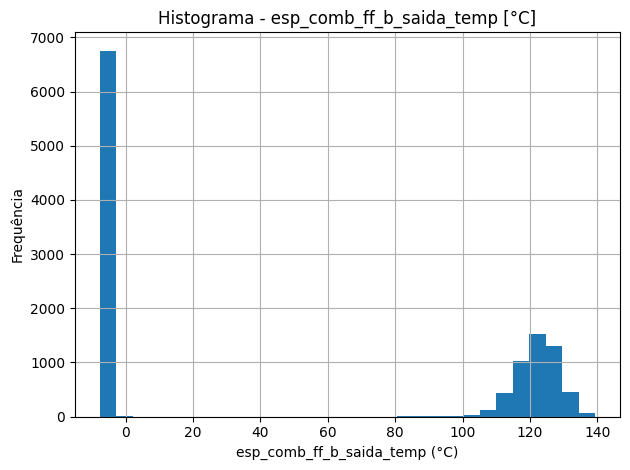

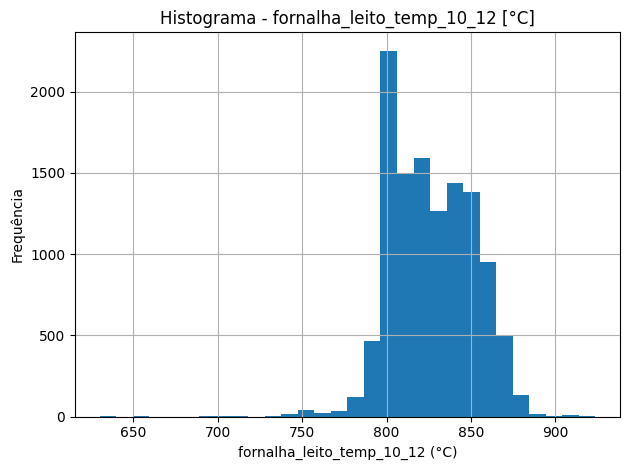

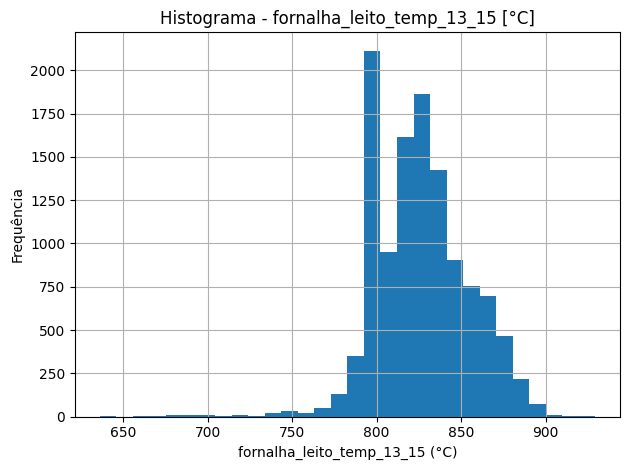

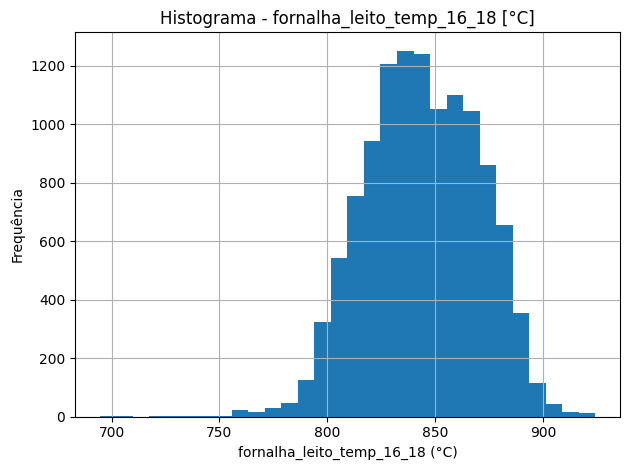

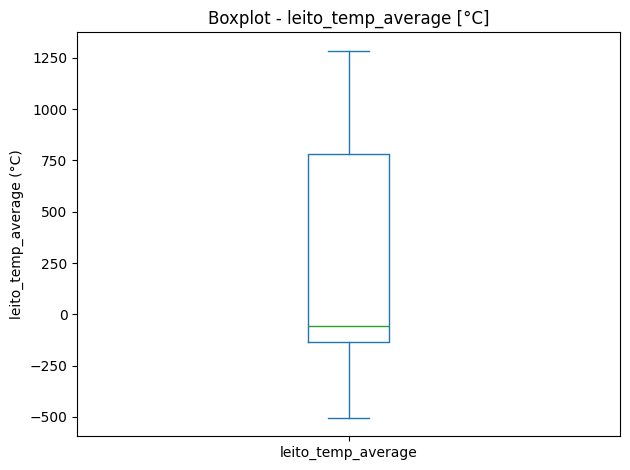

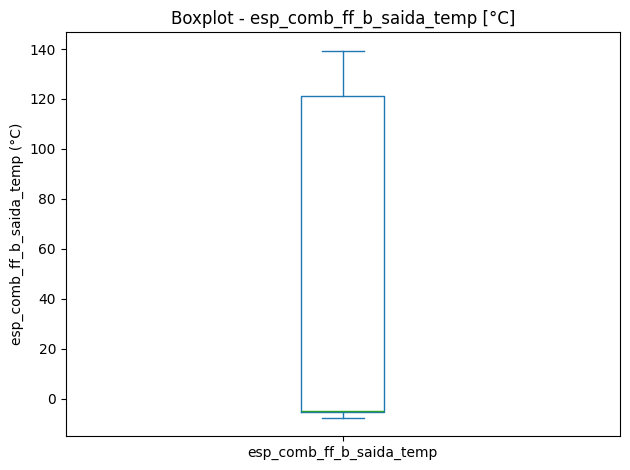

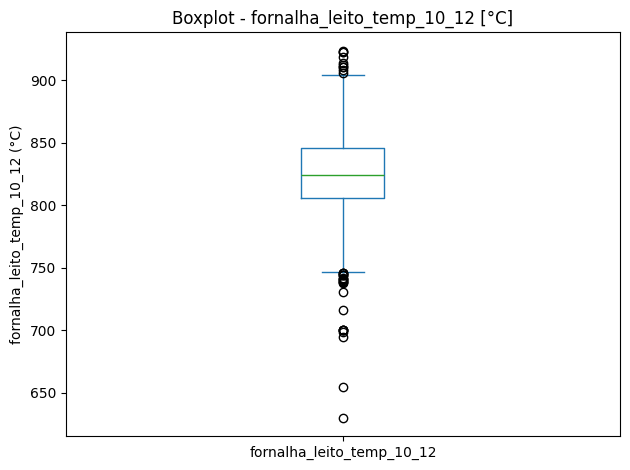

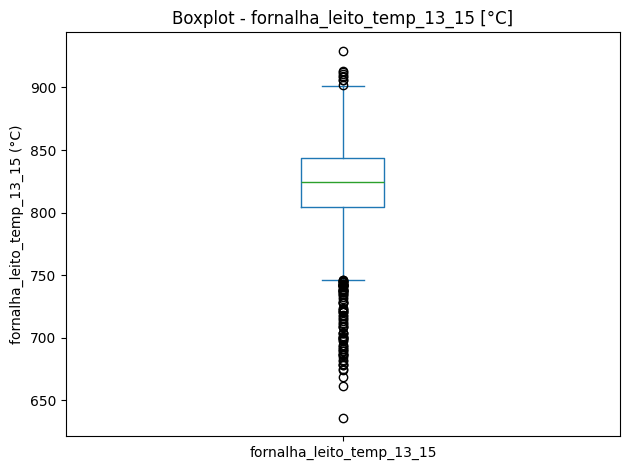

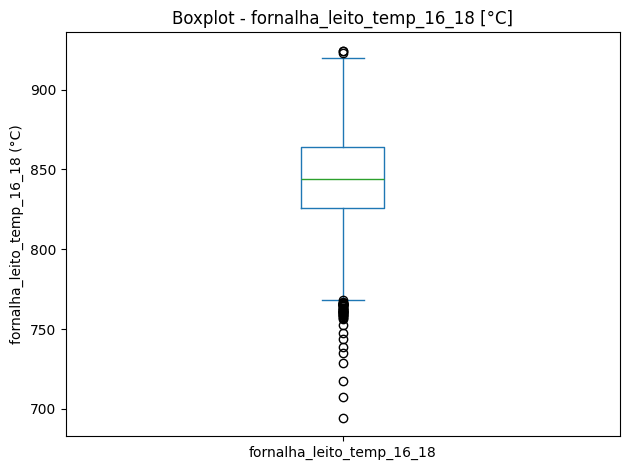

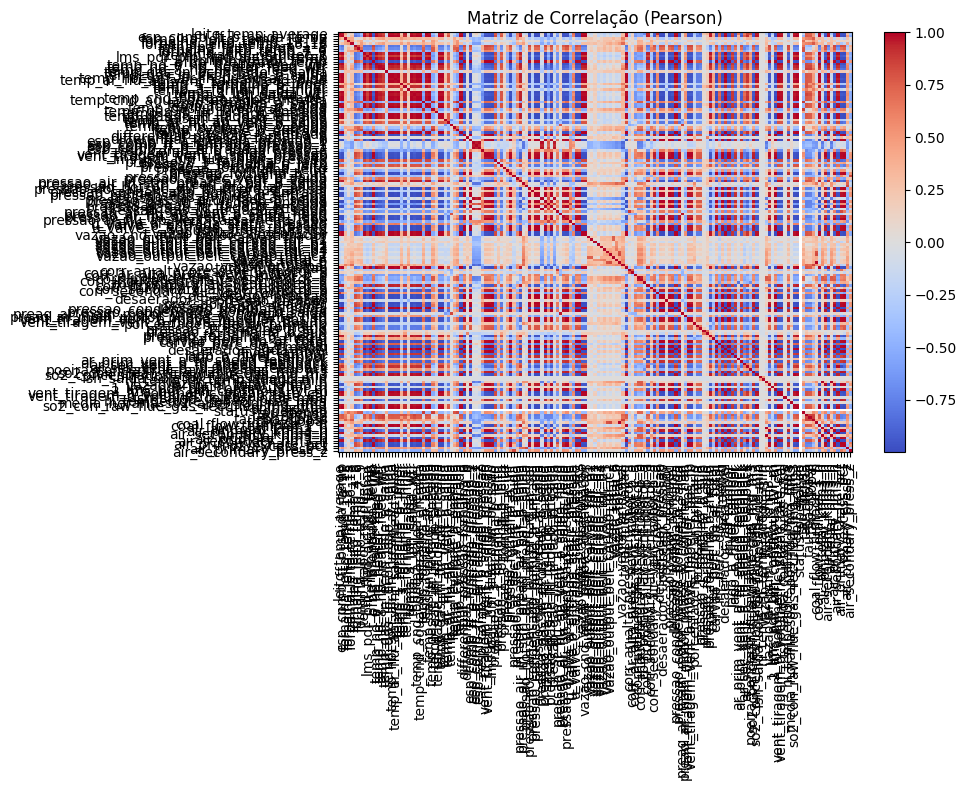

In [6]:
# ==============================================================
# RECONSTRUIR A1_ML_DL.CSV COM 2 CABEÇALHOS + EDA
# ==============================================================

import os, csv, time
import pandas as pd
import matplotlib.pyplot as plt

curated_dir = r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated"
base_candidates = [
    os.path.join(curated_dir, "a1_physics_informed_proxies.csv"),
    r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL\data\curated\a1_physics_informed_proxies.csv",
]
map_path = os.path.join(curated_dir, "auditoria_semantica_mapeamento.csv")
ml_path  = os.path.join(curated_dir, "A1_ML_DL.csv")

# 1) Localizar base
base_path = next((p for p in base_candidates if os.path.exists(p)), None)
if base_path is None:
    raise FileNotFoundError("CSV base 'a1_physics_informed_proxies.csv' não encontrado.")

# 2) Carregar base e dimensões
df_base = pd.read_csv(base_path, engine="python", sep=None)
if not os.path.exists(map_path):
    raise FileNotFoundError(f"Relatório de mapeamento não encontrado: {map_path}")
df_map = pd.read_csv(map_path)

if "coluna_original" not in df_map.columns or "dimensao" not in df_map.columns:
    raise RuntimeError("Relatório precisa conter 'coluna_original' e 'dimensao'.")

dim_por_col = (
    df_map.set_index("coluna_original")["dimensao"]
          .reindex(df_base.columns, fill_value="")
          .astype(str)
          .tolist()
)

# 3) Backup do arquivo antigo (se existir)
if os.path.exists(ml_path):
    ts = time.strftime("%Y%m%d_%H%M%S")
    os.replace(ml_path, ml_path.replace(".csv", f".backup_{ts}.csv"))

# 4) Escrever NOVO A1_ML_DL.csv com 2 cabeçalhos
with open(ml_path, "w", encoding="utf-8-sig", newline="") as f:
    w = csv.writer(f)
    w.writerow(list(df_base.columns))   # linha 1: nomes originais
    w.writerow(dim_por_col)             # linha 2: dimensões

# IMPORTANTE: anexar dados SEM header
df_base.to_csv(ml_path, mode="a", index=False, header=False, encoding="utf-8-sig", lineterminator="\n")

# 5) Validação: garantir que a 3ª linha não repete o cabeçalho
with open(ml_path, "r", encoding="utf-8-sig", newline="") as f:
    r = csv.reader(f)
    l1 = next(r)
    l2 = next(r)
    l3 = next(r)
assert l1 != l3, "Detectada 3ª linha igual ao cabeçalho. Abortando."

print(f"Reconstruído com exatamente 2 cabeçalhos: {ml_path}")

# ==============================================================
# EDA INICIAL
# ==============================================================

# Ler com MultiIndex de colunas: [0]=nomes, [1]=dimensões
df = pd.read_csv(ml_path, header=[0,1], engine="python")
dim_dict = {col: dim for (col, dim) in df.columns}
df.columns = [col for (col, dim) in df.columns]

print("\n--- VISÃO GERAL ---")
print("Shape (linhas, colunas):", df.shape)

print("\n--- AMOSTRA (5 linhas) ---")
print(df.head(5))

print("\n--- DIMENSÕES/UNIDADES (primeiras 30) ---")
for i, (col, dim) in enumerate(dim_dict.items()):
    if i >= 30:
        print("... (truncado)")
        break
    print(f"{col}: {dim}")

# Tentar coerção numérica onde possível
df_num = df.copy()
for c in df_num.columns:
    df_num[c] = pd.to_numeric(df_num[c], errors="ignore")

# Nulos por coluna (top 20)
print("\n--- NULOS (TOP 20 por %) ---")
nulos_pct = (df.isnull().sum() / len(df) * 100).round(2)
print(nulos_pct.sort_values(ascending=False).head(20))

# Estatísticas numéricas
num_cols = [c for c in df_num.columns if pd.api.types.is_numeric_dtype(df_num[c])]
print("\n--- CONTAGEM DE COLUNAS ---")
print("Numéricas:", len(num_cols), "| Não-numéricas:", df.shape[1] - len(num_cols))

if num_cols:
    print("\n--- ESTATÍSTICAS DESCRITIVAS (primeiras 20 numéricas) ---")
    print(df_num[num_cols].describe().T.head(20))
else:
    print("\nNenhuma coluna numérica detectada.")

# Histogramas (até 5 primeiras numéricas)
for col in num_cols[:5]:
    plt.figure()
    df_num[col].dropna().astype(float).hist(bins=30)
    plt.title(f"Histograma - {col} [{dim_dict.get(col,'')}]")
    plt.xlabel(f"{col} ({dim_dict.get(col,'')})")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

# Boxplots (até 5 primeiras numéricas)
for col in num_cols[:5]:
    plt.figure()
    df_num[col].dropna().astype(float).plot(kind="box")
    plt.title(f"Boxplot - {col} [{dim_dict.get(col,'')}]")
    plt.ylabel(f"{col} ({dim_dict.get(col,'')})")
    plt.tight_layout()
    plt.show()

# Correlação, se houver pelo menos 2 numéricas
if len(num_cols) >= 2:
    corr = df_num[num_cols].corr(method="pearson")
    plt.figure(figsize=(10, 8))
    plt.imshow(corr, cmap="coolwarm", interpolation="nearest", aspect="auto")
    plt.colorbar()
    plt.title("Matriz de Correlação (Pearson)")
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.tight_layout()
    plt.show()



Consulta: STATUS_OPERAÇÃO  ->  'status operacao'
  1. status_operacao  [score=1.000]  unidade='adimensional/nd'
  2. tau_backpass  [score=0.207]  unidade='nan'
  3. tau_global  [score=0.192]  unidade='nan'
-> Selecionado: status_operacao  (unidade: adimensional/nd)

Consulta: TOAL FLOW C  ->  'total flow c'
  1. vazao_total_c  [score=0.824]  unidade='t/h'
  2. total_fuel_vazao  [score=0.639]  unidade='t/h'
  3. vazao_total_a  [score=0.574]  unidade='t/h'
-> Selecionado: vazao_total_c  (unidade: t/h)

Consulta: VAZÃO DO AR PRIMÁRIO  ->  'vazao ar primario'
  1. porcentagem_de_ar_primario  [score=0.542]  unidade='adimensional/nd'
  2. vazao_ar_prim_total_knm3_h  [score=0.508]  unidade='adimensional/nd'
  3. vazao_vapor_principal  [score=0.488]  unidade='t/h'
-> [INFORMAÇÃO AUSENTE – PRECISAR PREENCHER]


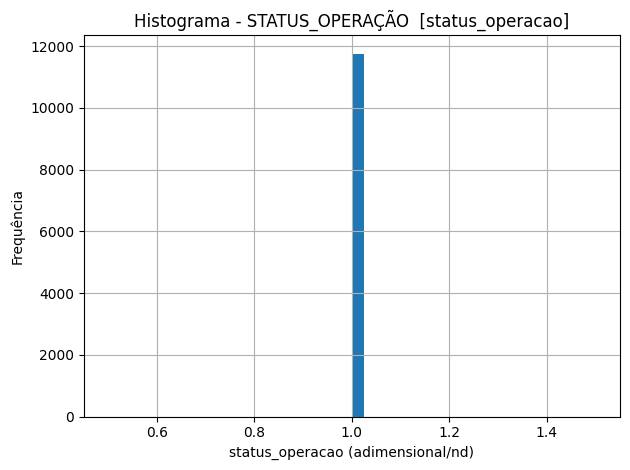

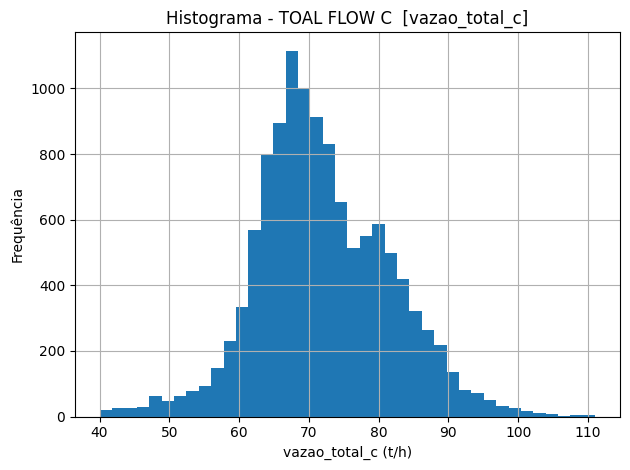

In [7]:
# ETAPA: HISTOGRAMAS COM BUSCA SEMÂNTICA DE VARIÁVEIS

import os, re, unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

# Caminho do dataset (2 cabeçalhos: linha 1 = nome, linha 2 = dimensão)
path_ml = r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\A1_ML_DL.csv"

# ---------------------------
# Utilidades de normalização e similaridade
# ---------------------------
def strip_accents(s: str) -> str:
    return "".join(c for c in unicodedata.normalize("NFKD", s) if not unicodedata.combining(c))

def normalize_token(s: str) -> str:
    s = strip_accents(str(s)).lower()
    s = re.sub(r"[^a-z0-9_\s]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def split_tokens(s: str):
    return set(t for t in re.split(r"[ _]+", normalize_token(s)) if t)

SUFIXOS_REMOVER = {
    "avg","mean","median","med","p05","p10","p25","p75","p90","p95",
    "min","max","std","var","zscore","pct","perc","sum","diff","delta",
    "rate","flag","bin","idx","index","norm","sel","out","in"
}

def remove_suffixes(name: str) -> str:
    toks = [t for t in re.split(r"[_\s]+", name) if t and t not in SUFIXOS_REMOVER and not re.fullmatch(r"[lL]?\d+", t)]
    return "_".join(toks) if toks else name

ALIASES = {
    # PT -> EN / termos afins
    "status": ["operacao","operational","operation","modo","state","status_operacao","oper_status"],
    "operacao": ["operation","operational","status","state","modo"],
    "total": ["flw","flow","fluxo","vazao","sum"],
    "flow": ["flw","fluxo","vazao","rate"],
    "fluxo": ["flow","vazao","flw"],
    "vazao": ["flow","fluxo","flw","rate"],
    "primario": ["primary","pa","ar_primario","primary_air"],
    "primary": ["primario","pa","primary_air"],
    "ar": ["air"],
    "c": ["_c","c_"],  # ajuda a casar sistema C em nomes com sufixos
    "pa": ["primary","primario","primary_air"],
}

def expand_with_aliases(tokens: set) -> set:
    out = set(tokens)
    for t in list(tokens):
        if t in ALIASES:
            out.update(ALIASES[t])
    return out

def jaccard(a: set, b: set) -> float:
    if not a or not b: return 0.0
    return len(a & b) / len(a | b)

def hybrid_similarity(a: str, b: str) -> float:
    a0, b0 = remove_suffixes(a), remove_suffixes(b)
    ta, tb = expand_with_aliases(split_tokens(a0)), expand_with_aliases(split_tokens(b0))
    jac = jaccard(ta, tb)
    seq = SequenceMatcher(None, normalize_token(a0), normalize_token(b0)).ratio()
    return 0.6*jac + 0.4*seq

def best_matches(query: str, candidates: list, topk: int = 3):
    scores = [(col, hybrid_similarity(query, col)) for col in candidates]
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:topk]

# ---------------------------
# Leitura do dataset
# ---------------------------
df_raw = pd.read_csv(path_ml, header=[0,1], engine="python")
# dict {nome_coluna: dimensão}
dims = {col: dim for (col, dim) in df_raw.columns}
# achata colunas para usar apenas os nomes no DataFrame
df = df_raw.copy()
df.columns = [col for (col, dim) in df_raw.columns]

# ---------------------------
# Alvos solicitados (consulta semântica)
# ---------------------------
consultas = {
    "STATUS_OPERAÇÃO": "status operacao",
    "TOAL FLOW C": "total flow c",              # aceitando o typo intencionalmente
    "VAZÃO DO AR PRIMÁRIO": "vazao ar primario"
}

colunas_existentes = list(df.columns)

# Resolve cada consulta para a melhor coluna
selecionadas = {}
for label, q in consultas.items():
    top = best_matches(q, colunas_existentes, topk=3)
    print(f"\nConsulta: {label}  ->  '{q}'")
    for i, (col, sc) in enumerate(top, start=1):
        print(f"  {i}. {col}  [score={sc:.3f}]  unidade='{dims.get(col,'')}'")
    if top and top[0][1] >= 0.58:   # limiar levemente permissivo para permitir casamento prático
        selecionadas[label] = top[0][0]
        print(f"-> Selecionado: {top[0][0]}  (unidade: {dims.get(top[0][0],'')})")
    else:
        selecionadas[label] = None
        print("-> [INFORMAÇÃO AUSENTE – PRECISAR PREENCHER]")

# ---------------------------
# Plot dos histogramas
# ---------------------------
for label, col in selecionadas.items():
    if not col:
        continue
    serie = pd.to_numeric(df[col], errors="coerce")
    validos = serie.dropna()
    if validos.empty:
        print(f"\nSem dados numéricos válidos para '{label}' ({col}).")
        continue

    plt.figure()
    validos.hist(bins=40)
    unidade = dims.get(col, "")
    plt.title(f"Histograma - {label}  [{col}]")
    xl = f"{col}" + (f" ({unidade})" if unidade else "")
    plt.xlabel(xl)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


In [8]:
# ETAPA: CATALOGO DE CABEÇALHOS (TRANSPOSTO) + AMOSTRA DE VALOR

import os
import pandas as pd
import numpy as np

# Caminho do arquivo
path_ml = r"C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\A1_ML_DL.csv"

# Leitura com 2 cabeçalhos (linha 1 = nome da coluna, linha 2 = dimensão)
df_raw = pd.read_csv(path_ml, header=[0,1], engine="python")

# Extrai dict {nome_coluna: dimensão} e "achata" o MultiIndex para usar os nomes
dim_por_col = {col: dim for (col, dim) in df_raw.columns}
df = df_raw.copy()
df.columns = [col for (col, dim) in df_raw.columns]

# Constrói o catálogo transposto: uma linha por coluna
linhas = []
for col in df.columns:
    serie = df[col]
    # Encontra um exemplo de valor (primeiro não nulo)
    exemplo = next((v for v in serie if pd.notna(v)), "")
    # Converte para string de forma segura
    if isinstance(exemplo, (float, np.floating)):
        # evita notação científica acidental
        exemplo_valor = f"{float(exemplo):.6g}"
    else:
        exemplo_valor = str(exemplo)
    linhas.append({
        "coluna": col,
        "dimensao": dim_por_col.get(col, ""),
        "exemplo_valor": exemplo_valor
    })

catalogo = pd.DataFrame(linhas, columns=["coluna", "dimensao", "exemplo_valor"])

# Salva no mesmo diretório do A1_ML_DL.csv
out_path = os.path.join(os.path.dirname(path_ml), "A1_ML_DL_cabecalhos_transpostos.csv")
catalogo.to_csv(out_path, index=False, encoding="utf-8-sig")

print(f"✅ Catálogo gerado: {out_path}")
print(f"Total de variáveis: {len(catalogo)}")

# Mostra uma prévia
catalogo.head(20)


✅ Catálogo gerado: C:\Users\wilso\MBA_EMPREENDEDORISMO\3AGD\A1_LOCAL_REFAZIMENTO\data\curated\A1_ML_DL_cabecalhos_transpostos.csv
Total de variáveis: 166


,coluna,dimensao,exemplo_valor
0,timestamp,timestamp,2023-03-01 07:00:00
1,leito_temp_average,°C,761.795
2,esp_comb_ff_b_saida_temp,°C,101.267
3,fornalha_leito_temp_10_12,°C,760.133
4,fornalha_leito_temp_13_15,°C,753.804
5,fornalha_leito_temp_16_18,°C,780.632
6,fornalha_leito_temp_1_3,°C,732.287
7,fornalha_leito_temp_4_6,°C,737.218
8,fornalha_leito_temp_7_9,°C,763.715
9,temp_vapor_reaquec_1,°C,533.551
